In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import plotly.express as px

In [9]:
villa = pd.read_csv("Cleaning.csv")

In [11]:
villa.drop(columns='Unnamed: 0', inplace=True)

In [13]:
vill_with_apart = villa[villa['apartments'] <= 5]
vill_with_apart.head()

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5,20.0,1,0,1,1,1,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,غربية,7,3,5,15.0,1,3,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000


In [15]:
vill_without_apart = villa[villa['apartments'] <= 0]
vill_without_apart.head()

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,غربية,7,3,5,15.0,1,3,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
5,شمالية شرقية,7,2,5,10.0,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,السويدي,غرب الرياض,800000.0,1600.000000
6,شمالية,6,2,5,20.0,1,0,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,2100000.0,7636.363636


In [17]:
vill_with_apart.shape

(44274, 25)

In [19]:
vill_with_apart = vill_with_apart[vill_with_apart['price'] <= 6000000]

In [21]:
vill_with_apart.shape

(43295, 25)

In [23]:
vill_without_apart.shape

(24533, 25)

In [25]:
vill_without_apart = vill_without_apart[vill_without_apart['price'] <= 6000000]

In [27]:
vill_without_apart.shape

(23759, 25)

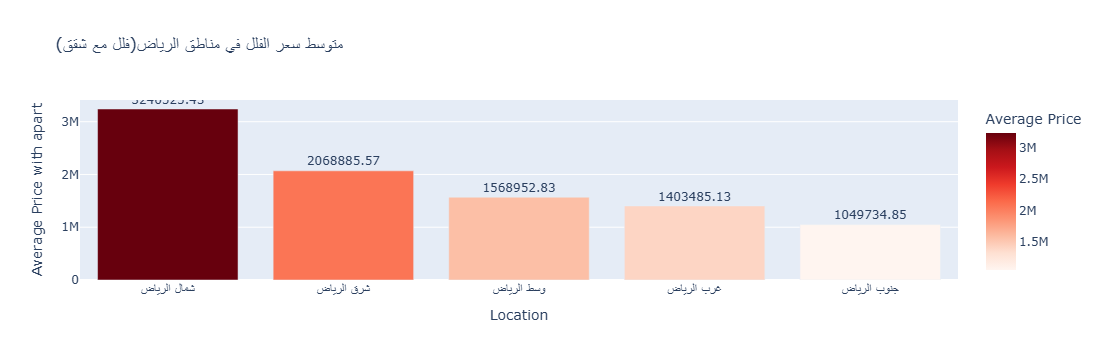

In [41]:
top_5_locations = vill_with_apart.groupby('location')['price'].mean().nlargest(5).reset_index()

# Plotting with Plotly
fig = px.bar(top_5_locations, 
             x='location', 
             y='price', 
             color='price', 
             color_continuous_scale='Reds',
             title='متوسط سعر الفلل في مناطق الرياض(فلل مع شقق)',
             labels={'price': 'Average Price', 'location': 'Location'},
             text='price')

# Show the plot
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(title='Location'), 
                  yaxis=dict(title='Average Price with apart'),
                  showlegend=False)
fig.show()

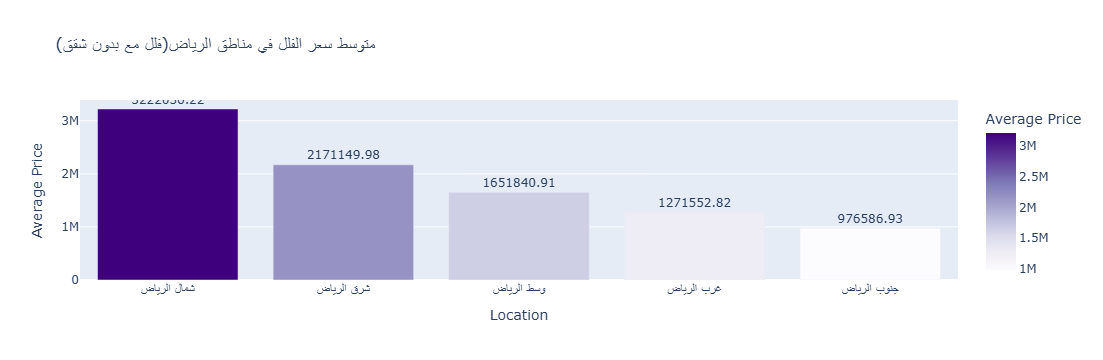

In [37]:
top_5_locations = vill_without_apart.groupby('location')['price'].mean().nlargest(5).reset_index()

# Plotting with Plotly
fig = px.bar(top_5_locations, 
             x='location', 
             y='price', 
             color='price', 
             color_continuous_scale='Purples',
             title='متوسط سعر الفلل في مناطق الرياض(فلل مع بدون شقق)',
             labels={'price': 'Average Price', 'location': 'Location'},
             text='price')

# Show the plot
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(title='Location'), 
                  yaxis=dict(title='Average Price'),
                  showlegend=False)
fig.show()

In [43]:
def categorize_rooms(num_rooms):
    if num_rooms in [1, 2, 3]:
        return '1-3 Rooms'
    elif num_rooms in [4, 5]:
        return '4-5 Rooms'
    elif num_rooms in [6, 7]:
        return '6+ Rooms'

villa['Room_Category'] = vill_with_apart['rooms'].apply(categorize_rooms)



In [45]:
grouped_data = villa.groupby(['location', 'Room_Category']).size().reset_index(name='Count')
grouped_data

,location,Room_Category,Count
0,جنوب الرياض,1-3 Rooms,736
1,جنوب الرياض,4-5 Rooms,7092
2,جنوب الرياض,6+ Rooms,1102
3,شرق الرياض,1-3 Rooms,1232
4,شرق الرياض,4-5 Rooms,9108
5,شرق الرياض,6+ Rooms,2224
6,شمال الرياض,1-3 Rooms,811
7,شمال الرياض,4-5 Rooms,6457
8,شمال الرياض,6+ Rooms,875
9,غرب الرياض,1-3 Rooms,945


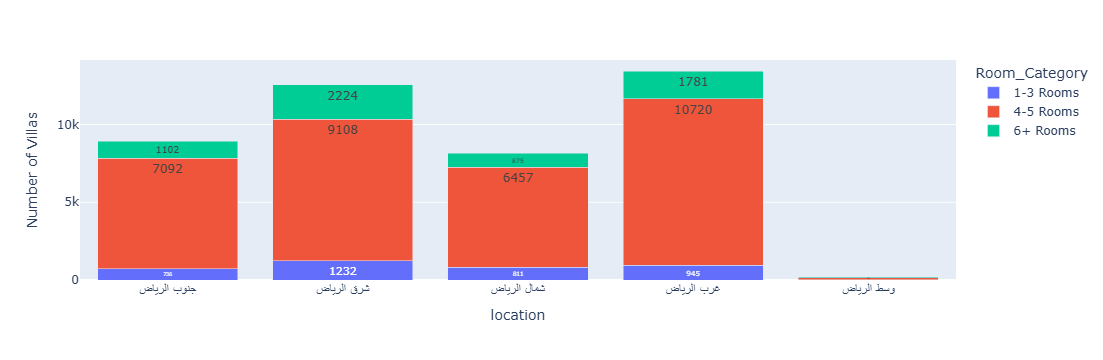

In [47]:

fig = px.bar(grouped_data, 
             x='location', 
             y='Count', 
             color='Room_Category', 
             barmode='stack',
             title='',
             labels={'Count': 'Number of Villas', 'Location': 'Location'},
             text='Count')


fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

In [49]:
vill_with_apart.to_csv("Cleaning.csv")